#### Transfer learning in image classification

we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand

In [1]:
## Install tensorflowhub using pip3 install tensorflow-hub

In [2]:
pip install tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2

In [7]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import PIL.Image as image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-12-18 05:01:30.382212: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 05:01:32.737902: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 05:01:32.737992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 05:01:33.073943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 05:01:34.665480: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 05:01:34.666915: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [9]:
## Making the predictions using pre trained model(imported model without any traning )
image_shape = (224, 224)
classifier=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=image_shape+(3,))
])

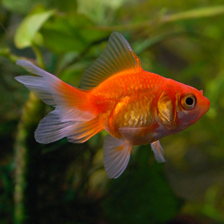

In [10]:
gold_fish=image.open('goldfish.jpg').resize(image_shape)
gold_fish

In [11]:
gold_fish=np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [12]:
gold_fish[np.newaxis, ...]
## Adding a new axis to the image to make it compatible with the model
## The model expects a batch of images as input
## The new axis is added at the beginning of the array
## The new shape of the array is (1, 224, 224, 3)

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [13]:
result=classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 699ms/step


(1, 1001)

In [14]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [15]:
## The model returns a vector of logits or log-odds scores that specify the probability of each class
## The predicted label is the index with the highest score in the logits vector
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open('ImageNetLabels.txt','r') as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [16]:
image_labels[predicted_label_index]

'goldfish'

In [17]:
## load the flowers dataset
datast_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=datast_url,untar=True)
## cache_dir is the location where the downloaded dataset is stored
# . means the current directory
# .. means the parent directory
## untar=True means the file is unzipped


In [18]:
data_dir

'/home/codespace/.keras/datasets/flower_photos'

In [19]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/home/codespace/.keras/datasets/flower_photos')

In [20]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/home/codespace/.keras/datasets/flower_photos/dandelion/14053397367_75cba846eb_n.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/dandelion/19440660848_c789227129_m.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/dandelion/751941983_58e1ae3957_m.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/dandelion/921252114_91e334b950.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/dandelion/20456824132_b1c8fbfa41_m.jpg')]

In [21]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [22]:
rosses=list(data_dir.glob('roses/*'))
rosses[:5]

[PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/15738649506_2b4c2fd933_m.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/8035910225_125beceb98_n.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/6347847065_83cf87333b_n.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg')]

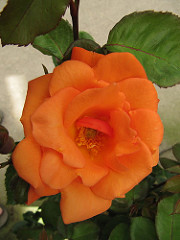

In [23]:
## as PIL.Image is imported as image
image.open(str(rosses[0]))

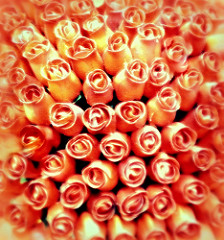

In [24]:
image.open(str(rosses[1]))

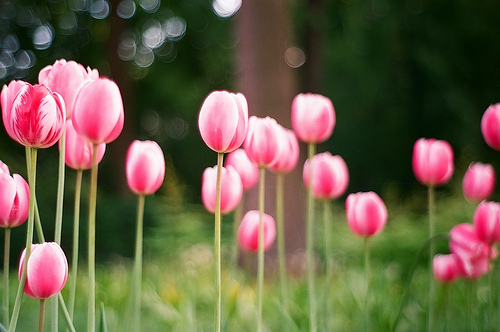

In [25]:
tulips=list(data_dir.glob('tulips/*'))
image.open(str(tulips[0]))

In [26]:
## read the flowers images from disk into numpy array using opencv
## opencv reads images as BGR
## convert BGR to RGB
## resize the images to 224x224
## convert the images to float32
## divide the images by 255 to normalize the pixel values in the range 0-1
## add a new axis to the array to hold the batch size
## The new shape of the array is (1, 224, 224, 3)
## The model expects a batch of images as input
## The new axis is added at the beginning of the array
## The new shape of the array is (1, 224, 224, 3)
## the images are stored in the form of dictionary of list of images of path

In [27]:

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [28]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [29]:
flowers_images_dict['roses'][:5]

[PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/15738649506_2b4c2fd933_m.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/8035910225_125beceb98_n.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/6347847065_83cf87333b_n.jpg'),
 PosixPath('/home/codespace/.keras/datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg')]

In [30]:
str(flowers_images_dict['roses'][0])

'/home/codespace/.keras/datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'

In [31]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 180, 3)

In [32]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [33]:
x,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [34]:
x=np.array(x)
y=np.array(y)

In [35]:
## Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)

In [36]:
## preprocess the images
x_train_scaled=x_train/255
x_test_scaled=x_test/255


In [37]:
## making the predictions using the pre trained model
x[0].shape

(224, 224, 3)

In [38]:
image_shape+(3,)

(224, 224, 3)

In [39]:
image_shape

(224, 224)

In [40]:
x0_resized = cv2.resize(x[0], image_shape)
x1_resized = cv2.resize(x[1], image_shape)
x2_resized = cv2.resize(x[2],image_shape)


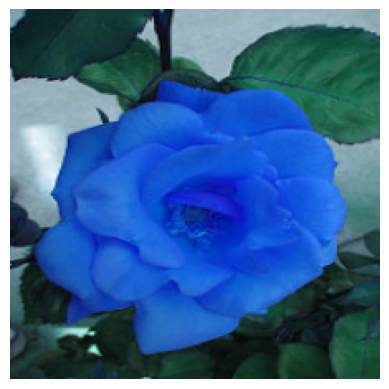

In [41]:
plt.axis('off')
plt.imshow(x0_resized)

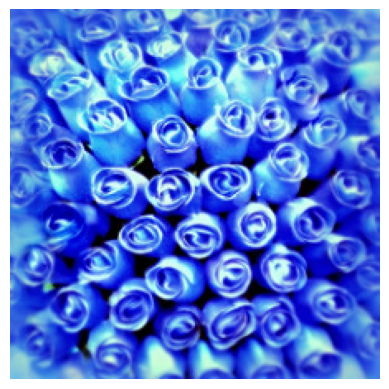

In [42]:
plt.axis('off')
plt.imshow(x1_resized)

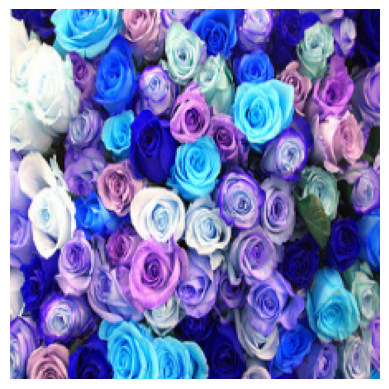

In [43]:
plt.axis('off') 
plt.imshow(x2_resized)

In [44]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 314ms/step


array([795, 550, 795])

In [45]:
image_labels[795]

'shower curtain'

##### Now take pre-trained model and retrain it using flowers images

In [46]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [47]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [48]:
model.compile(
  optimizer="adam",
  # optimizer=tf.keras.optimizers.SparseAdam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc']
)


In [49]:
# model.fit(x_train_scaled, y_train, epochs=5)
batch_size = 10
model.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=5)

: 

In [ ]:
model.evaluate(X_test_scaled,y_test)

NameError: name 'model' is not defined